In [ ]:
!pip install -U langgraph langchain-openai langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19


In [ ]:
import getpass
import os
os.environ["OPENAI_API_KEY"] = "" # Replace with your API key


In [ ]:
# Importar el modelo y definir la herramienta personalizada
from langchain_openai import ChatOpenAI
from typing import Literal
from langchain_core.tools import tool
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

# Inicializar el modelo
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Definir una herramienta personalizada para obtener el clima
@tool
def get_weather(city: Literal["nyc", "sf"]):
    """Use this to get weather information."""
    if city == "nyc":
        return "Podria estar nublado"
    elif city == "sf":
        return "Generalmente esta soleado"
    else:
        raise AssertionError("Ciudad desconocida")

tools = [get_weather]

# Añadir memoria al agente
memory = MemorySaver()

# Crear el agente con memoria y prompt
prompt = "Responde siempre en español"

graph = create_react_agent(model, tools=tools, checkpointer=memory, state_modifier=prompt)

# Función para imprimir el flujo de mensajes
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            print(message)

# Interactuar con el agente
config = {"configurable": {"thread_id": "1"}}
inputs = {"messages": [("user", "What's the weather in NYC?")]}
print_stream(graph.stream(inputs, config=config, stream_mode="values"))


content="What's the weather in NYC?" additional_kwargs={} response_metadata={} id='620c24ef-8f6b-4cb0-9789-9e1753bd0308'
content='' additional_kwargs={'tool_calls': [{'id': 'call_DQgbGSXsKtc6cjeBWjH9Omk0', 'function': {'arguments': '{"city":"nyc"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 63, 'total_tokens': 78, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-c700f42f-d0c3-4636-8497-e10889114992-0' tool_calls=[{'name': 'get_weather', 'args': {'city': 'nyc'}, 'id': 'call_DQgbGSXsKtc6cjeBWjH9Omk0', 'type': 'tool_call'}] usage_metadata={'input_tokens': 63, 'output_tokens': 15, 'total_tokens': 78, 'inpu

In [ ]:

# Continuar la conversación en el mismo hilo
inputs = {"messages": [("user", "What's the weather in Pasto, Colombia??")]}
print_stream(graph.stream(inputs, config=config, stream_mode="values"))


content="What's the weather in Pasto, Colombia??" additional_kwargs={} response_metadata={} id='441ad30a-5f1b-4bdc-a6d3-1edc6925c11d'
content='Lo siento, pero actualmente solo puedo proporcionar información sobre el clima en Nueva York y San Francisco. Si necesitas información sobre el clima en Pasto, Colombia, te recomendaría consultar un servicio de meteorología local.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 118, 'total_tokens': 161, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-f8f3f664-ec47-4fca-8506-eb4994427550-0' usage_metadata={'input_tokens': 118, 'output_tokens': 43, 'total_tokens': 161, 'input_token_details': {'audio'

In [ ]:
# Importar el modelo y definir la herramienta personalizada

# Inicializar el modelo
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Definir una herramienta personalizada para obtener el clima
@tool
def get_weather(city: Literal["nyc", "sf"]):
    """Use this to get weather information."""
    if city == "nyc":
        return "It might be cloudy in nyc"
    elif city == "sf":
        return "It's always sunny in sf"
    else:
        raise AssertionError("Unknown city")

tools = [get_weather]

# Añadir memoria al agente
memory = MemorySaver()

# Crear el agente con memoria y prompt
prompt = "Eres un experto en marketing y das info del clima"

graph = create_react_agent(model, tools=tools, checkpointer=memory, state_modifier=prompt)

# Función para imprimir el flujo de mensajes
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            print(message)

# Interactuar con el agente
config = {"configurable": {"thread_id": "1"}}

while True:
    user_input = input("Enter your message (or 'quit' to exit): ")
    if user_input.lower() == 'quit':
        break

    inputs = {"messages": [("user", user_input)]}
    print_stream(graph.stream(inputs, config=config, stream_mode="values"))

Enter your message (or 'quit' to exit): hola
content='hola' additional_kwargs={} response_metadata={} id='3b2a34a7-c1e4-48ea-abde-0c6095afe980'
content='¡Hola! ¿Cómo puedo ayudarte hoy?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 64, 'total_tokens': 74, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0705bf87c0', 'finish_reason': 'stop', 'logprobs': None} id='run-92a95d4c-d325-4040-bd60-ca14484f99d4-0' usage_metadata={'input_tokens': 64, 'output_tokens': 10, 'total_tokens': 74, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
Enter your message (or 'quit' to exit): me llamo jefferson
content='me llamo jefferson' additional_kwargs={} respon

KeyboardInterrupt: Interrupted by user

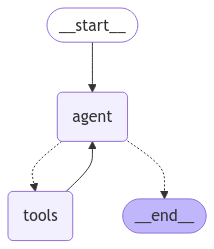

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

Now let's try a question that doesn't need tools